<a href="https://colab.research.google.com/github/brancatellimat/speech-emotion-recognition/blob/main/KNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform KNN algorithm

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tqdm import tqdm

import os
import sys
import math

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import librosa.feature as libf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, minmax_scale, scale, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as knn

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

from scipy.stats import kurtosis
from scipy.stats import skew

eps = sys.float_info.epsilon

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Read features csv as pandas dataframe

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Audio Pattern Recognition/Project_Brancatelli/features.csv')
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.214355,0.319824,0.429688,0.423340,0.421875,0.436035,0.427734,0.434570,0.426758,0.397949,...,-21.660831,-8.824115,7.443534,5.859727,-0.321161,-15.598403,-11.630619,-11.754715,4.756393,angry
1,0.253906,0.388184,0.514648,0.510254,0.506836,0.495117,0.493164,0.479492,0.486816,0.495117,...,-20.565357,-6.349044,8.264988,5.284755,0.973508,-13.907689,-12.484719,-9.336018,3.070137,angry
2,0.218750,0.323730,0.421387,0.418945,0.411133,0.416016,0.416992,0.416504,0.404785,0.382324,...,-11.227339,-2.053445,11.747261,7.627929,-12.674572,-24.245716,-4.193148,3.420844,23.195007,angry
3,0.249512,0.368164,0.495117,0.497559,0.496094,0.491211,0.495605,0.499512,0.498047,0.508301,...,-11.301952,1.284632,9.955471,6.450918,-15.117396,-19.702325,-4.617732,2.827433,19.260487,angry
4,0.312500,0.495605,0.720215,0.666016,0.688477,0.586914,0.575684,0.666992,0.578125,0.670410,...,-0.363573,-0.588626,-0.576606,-0.317693,0.132963,0.652741,1.079558,1.260494,1.101743,disgust


In [ ]:
X = features.iloc[:, :-1]
Y = features['Emotions']


In [ ]:
# Scale features using StandardScaler

scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(X)
scaled_both = pd.DataFrame(scaled_dataset)
scaled_both['Emotions'] = Y
scaled_both.head()

scaled_both = scaled_both.fillna(0)

X = scaled_both.iloc[:, :-1].values
Y = scaled_both['Emotions'].values
#both.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27193, 2376), (27193,), (6799, 2376), (6799,))

In [ ]:
print('Number of rows in train:', x_train.shape[0])
print('Number of rows in test:', x_test.shape[0])

Number of rows in train: 27193
Number of rows in test: 6799


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

No GPU, using /device:CPU:0.


In [ ]:
def KNN_classifier(x_train,y_train,x_test,y_test):

    print('Starting KNN Classifier')
    nn = [5,10,15,20]
    weights = ['uniform', 'distance']
    best_accuracy_knn = 0
    best_nn = 0
    best_pred = pd.DataFrame()
    best_weight = ''

    for i in tqdm(nn):
      for weight in tqdm(weights):
        model_knn = knn(n_neighbors = i, weights=weight)
        model_knn.fit(x_train,y_train)
        y_pred = model_knn.predict(x_test)
        prediction_accuracy = round(accuracy_score(y_test, y_pred),4)
        if best_accuracy_knn < prediction_accuracy:
            best_accuracy_knn = prediction_accuracy
            best_nn = i
            best_pred = y_pred
            best_weight = weight

        print('Accuracy: ',prediction_accuracy ,'for nearest neighbor: ',i, ' weight: ', weight)

    print('Best accuracy of K-Nearest Neighbor:',best_accuracy_knn,'for Nearest Neighbor:',best_nn, ' and weight ', best_weight)

    return best_pred;

In [ ]:
y_pred = KNN_classifier(x_train, y_train, x_test, y_test)

Starting KNN Classifier


 50%|█████     | 1/2 [00:36<00:36, 36.81s/it]

Accuracy:  0.538 for nearest neighbor:  5  weight:  uniform



 25%|██▌       | 1/4 [01:11<03:33, 71.23s/it]

Accuracy:  0.6925 for nearest neighbor:  5  weight:  distance



 50%|█████     | 1/2 [00:36<00:36, 36.84s/it]

Accuracy:  0.4823 for nearest neighbor:  10  weight:  uniform



 50%|█████     | 2/4 [02:23<02:23, 71.94s/it]

Accuracy:  0.5983 for nearest neighbor:  10  weight:  distance



 50%|█████     | 1/2 [00:42<00:42, 42.58s/it]

Accuracy:  0.4548 for nearest neighbor:  15  weight:  uniform



 75%|███████▌  | 3/4 [03:49<01:18, 78.11s/it]

Accuracy:  0.5541 for nearest neighbor:  15  weight:  distance



 50%|█████     | 1/2 [00:37<00:37, 37.32s/it]

Accuracy:  0.4407 for nearest neighbor:  20  weight:  uniform



100%|██████████| 4/4 [05:00<00:00, 75.00s/it]

Accuracy:  0.5207 for nearest neighbor:  20  weight:  distance
Best accuracy of K-Nearest Neighbor: 0.6925 for Nearest Neighbor: 5  and weight  distance


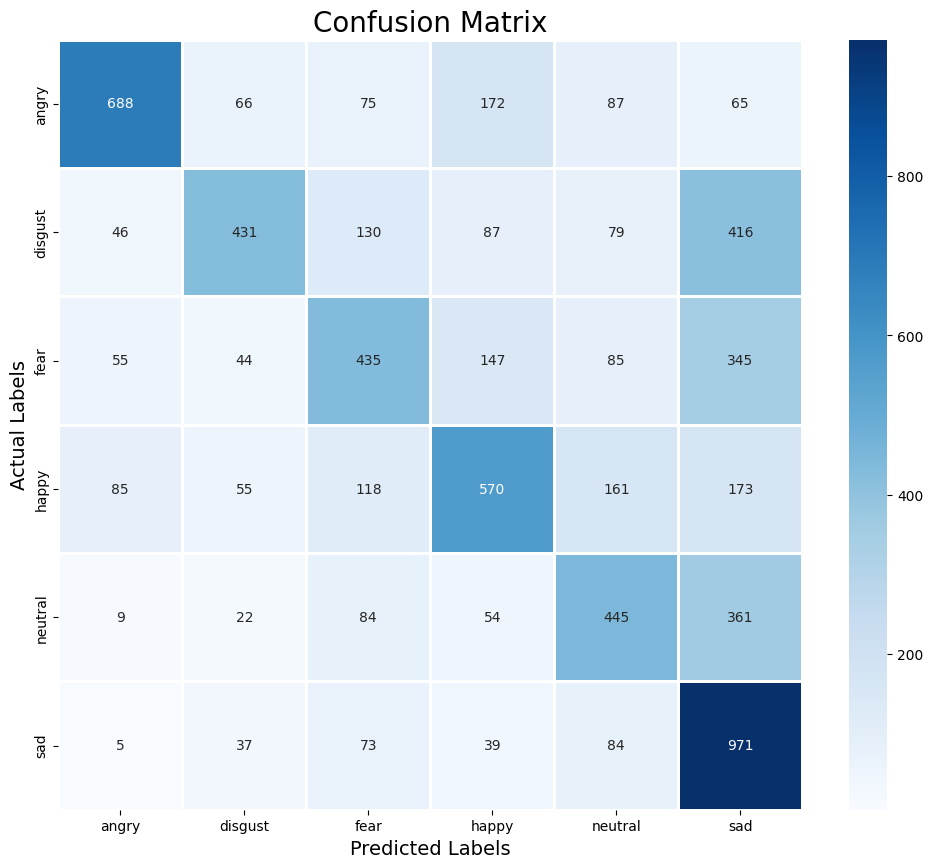

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in np.unique(y_test)] , columns = [i for i in np.unique(y_test)])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))

0.5206648036475953


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,neutral,fear
1,neutral,disgust
2,sad,sad
3,sad,neutral
4,fear,disgust
5,happy,happy
6,sad,sad
7,sad,sad
8,angry,angry
9,sad,fear


In [ ]:
model_knn = knn(n_neighbors = 5, weights='distance')
model_knn.fit(x_train,y_train)
y_pred = model_knn.predict(x_test)

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from itertools import cycle
import matplotlib.pyplot as plt

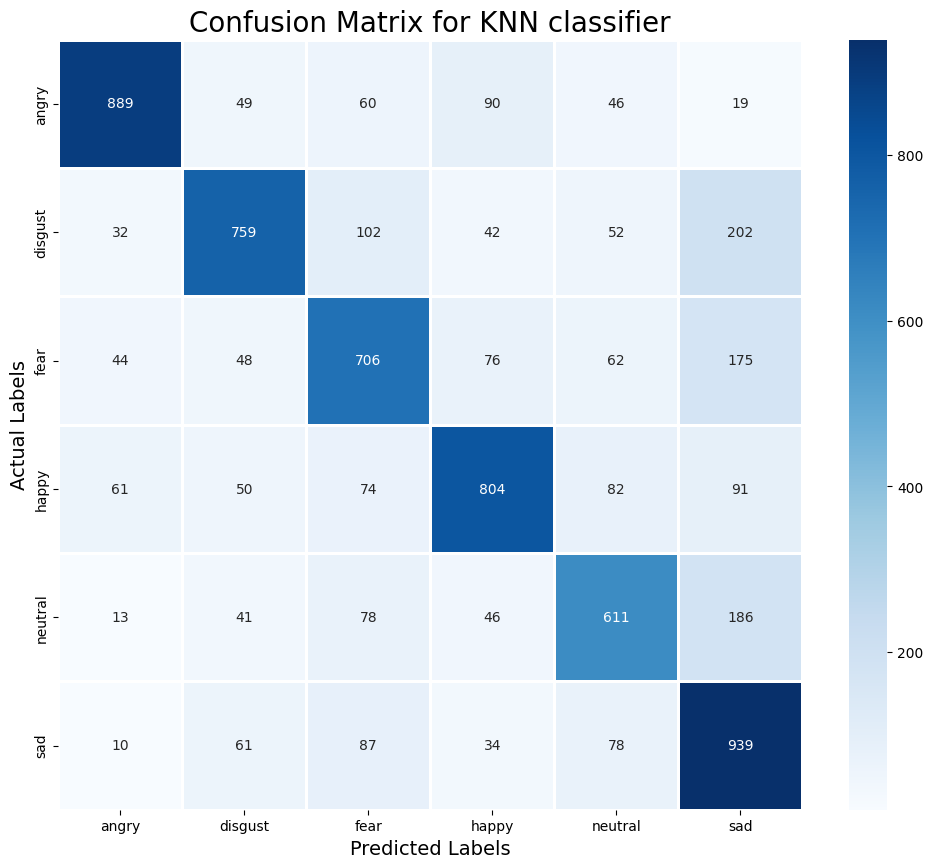

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in np.unique(y_test)] , columns = [i for i in np.unique(y_test)])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for KNN classifier', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.85      0.77      0.81      1153
     disgust       0.75      0.64      0.69      1189
        fear       0.64      0.64      0.64      1111
       happy       0.74      0.69      0.71      1162
     neutral       0.66      0.63      0.64       975
         sad       0.58      0.78      0.67      1209

    accuracy                           0.69      6799
   macro avg       0.70      0.69      0.69      6799
weighted avg       0.70      0.69      0.69      6799

